# Screening for Phase Stability

In many applications, it is useful to be able to screen for regions of space that have certain phases or desirable properties.

This example shows how to index into [xarray](http://xarray.pydata.org) `Dataset` objects that are returned from pycalphad `equilibrium` calculations to find regions of conditions space where the desired phases are stable.

## Binary phase diagram

First we plot the binary phase diagram so that we can visualize the phase regions that we will search to screen.

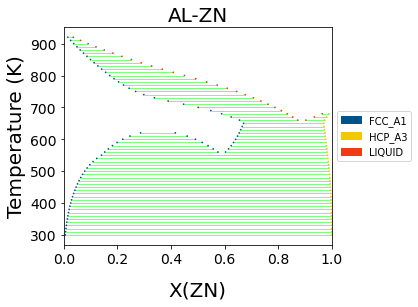

In [1]:
import matplotlib.pyplot as plt
from pycalphad import Database, binplot, equilibrium
import pycalphad.variables as v

# Load database and choose the phases that will be considered
dbf = Database('alzn_mey.tdb')
components = ['AL', 'ZN', 'VA']
phases = ['LIQUID', 'FCC_A1', 'HCP_A3']
conditions = {v.X('ZN'):(0,1,0.02), v.T: (300, 1000, 10), v.P:101325, v.N: 1}

# Compute the phase diagram
binplot(dbf, components, phases, conditions)
plt.show()

## Screening
We use `equilibrium` to do a dense grid of calculations over the conditions. Then we define the list of `Phases` that we want to screen for and index into the result from `equilibrium` to find where these are stable.

In [2]:
# Perform an equilibrim calculation in a multi-dimensional grid over all the conditions
eq_result = equilibrium(dbf, components, phases, conditions)

### FCC and HCP two-phase regions

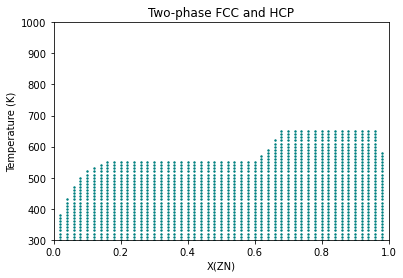

In [3]:
mask_cond = (eq_result.Phase.isin('FCC_A1').sum(dim='vertex') == 1) & (eq_result.Phase.isin('HCP_A3').sum(dim='vertex') == 1)
X_ZN = eq_result.X_ZN.where(mask_cond).transpose(*mask_cond.dims)
T = eq_result.T.where(mask_cond).transpose(*mask_cond.dims)
plt.scatter(X_ZN, T, c='teal', s=2)

plt.title('Two-phase FCC and HCP')
plt.xlabel('X(ZN)')
plt.ylabel('Temperature (K)')

plt.xlim(0, 1)
plt.ylim(conditions[v.T][0], conditions[v.T][1])
plt.show()

### FCC is at least one of the stable phases

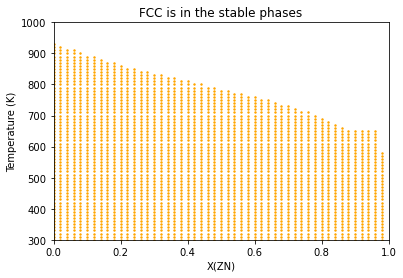

In [4]:
mask_cond = (eq_result.Phase.isin('FCC_A1').sum(dim='vertex') >= 1)
X_ZN = eq_result.X_ZN.where(mask_cond).transpose(*mask_cond.dims)
T = eq_result.T.where(mask_cond).transpose(*mask_cond.dims)
plt.scatter(X_ZN, T, c='orange', s=2)

plt.title('FCC is in the stable phases')
plt.xlabel('X(ZN)')
plt.ylabel('Temperature (K)')

plt.xlim(0, 1)
plt.ylim(conditions[v.T][0], conditions[v.T][1])
plt.show()

### FCC single-phase regions

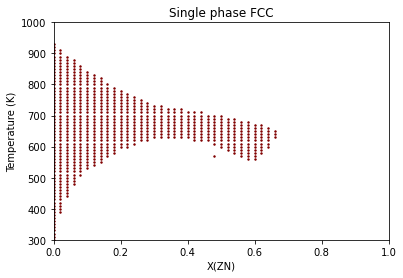

In [5]:
# Need to check that the other possible phases are empty, i.e. `''`
mask_cond = (eq_result.Phase.isin('FCC_A1').sum(dim='vertex') == 1) & (eq_result.Phase.isin('').sum(dim='vertex') == 2)
X_ZN = eq_result.X_ZN.where(mask_cond).transpose(*mask_cond.dims)
T = eq_result.T.where(mask_cond).transpose(*mask_cond.dims)
plt.scatter(X_ZN, T, c='maroon', s=2)

plt.title('Single phase FCC')
plt.xlabel('X(ZN)')
plt.ylabel('Temperature (K)')

plt.xlim(0, 1)
plt.ylim(conditions[v.T][0], conditions[v.T][1])
plt.show()

### FCC miscibility gap

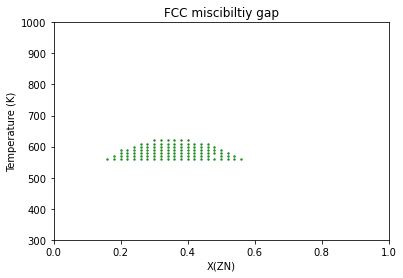

In [6]:
mask_cond = eq_result.Phase.isin('FCC_A1').sum(dim='vertex') == 2
X_ZN = eq_result.X_ZN.where(mask_cond).transpose(*mask_cond.dims)
T = eq_result.T.where(mask_cond).transpose(*mask_cond.dims)
plt.scatter(X_ZN, T, c='forestgreen', s=2)

plt.title('FCC miscibiltiy gap')
plt.xlabel('X(ZN)')
plt.ylabel('Temperature (K)')

plt.xlim(0, 1)
plt.ylim(conditions[v.T][0], conditions[v.T][1])
plt.show()